<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/snake_chess_board.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo

In [1]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
import time
#plt.rcParams["figure.figsize"] = (15,10)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.31.1 which is incompatible.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.

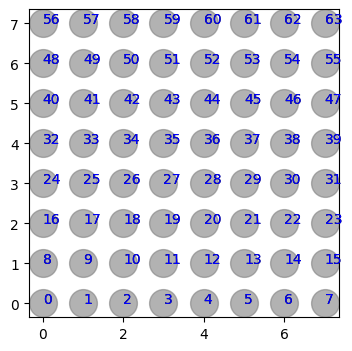

In [57]:
counter = 0
data = {}
for r in range(8):
  for c in range(8):
    data[counter]=(c,r)
    counter+=1

nodes = [n for n in range(counter)]
def dist(i,j):
  return ((data[i][0]-data[j][0])**2+(data[i][1]-data[j][1])**2)

connect

plt.figure(figsize=(4,4))
for n, (i,j) in data.items():
  plt.scatter(i,j,s=400, c= 'grey', alpha= 0.6)
  plt.text(i,j, s=str(n))

blocked =[35]
connect = [(i,j) for i in nodes for j in nodes if dist(i,j)==1 and i not in blocked and j not in blocked]

for n, (i,j) in data.items():
  #plt.scatter(i,j,s=400, c= 'grey', alpha= 0.6)
  plt.text(i,j, s=str(n), color='b')

({2, 3, 4, 5, 6, 7, 8, 9}, {0, 1, 2, 3, 4, 5, 6, 7}, [0, 1, 2, 3, 4, 5, 6, 7])

In [101]:
def check(start):
  model = cp_model.CpModel()
  solver = cp_model.CpSolver()
  select = {n:model.NewBoolVar(f"select_{n}") for n in nodes}
  flow = {(i,j):model.NewBoolVar(f"flow_{i}_{j}") for (i,j) in connect}
  final = {n:model.NewBoolVar(f"linked_{n}") for n in nodes if n!=start and n not in blocked}


  expr_final = [v for n,v in final.items()]
  model.AddExactlyOne(expr_final)

  expr = [(i,j,v) for (i,j),v in flow.items()] + [(i,i,v.Not()) for i,v in select.items()] + [(j,start,final[j]) for j in nodes if  j not in blocked + [start]]

  for (i,j),v in flow.items():
    model.Add(v <= select[i])
    model.Add(v <= select[j])

  for n in nodes:
    if n not in blocked:
      model.Add(select[n]==1)

  model.AddCircuit(expr)

  st = time.time()
  status = solver.Solve(model)

  et = time.time()
  select_vec = [n for n,v in select.items() if solver.value(v)>0]
  flow_vec = [(i,j) for (i,j),v in flow.items() if solver.value(v)>0]
  final_node = [n for n,v in final.items() if solver.value(v)>0]
  return status, select_vec, flow_vec, final_node


In [102]:
report = {}
explored = []
for start in nodes:
  if start not in blocked+explored:
    status, selectlist, flowlist, finallist = check(start)
    if status == cp_model.OPTIMAL:
      report[start] = [ status, selectlist, flowlist, finallist]
      print(start)
      explored+=finallist


0
2
4
6
9
13
15
16
18
20
22
25
29
31
34
36
38
41
43
50
54


In [98]:
len(report)

21

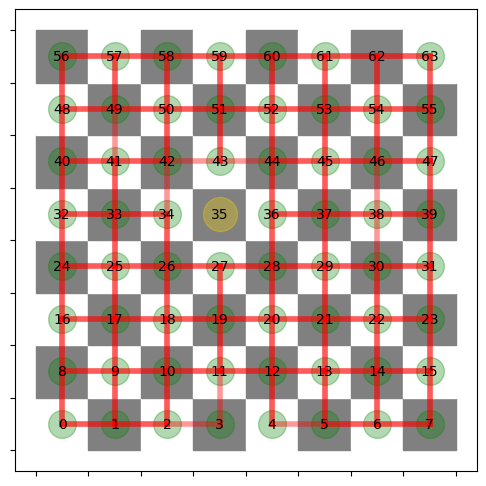

In [103]:
import matplotlib.pyplot as plt

# Create an 8x8 grid
fig, ax = plt.subplots(figsize=(6, 6))
# Add square indices (0–63)
for n , (r,c) in data.items():
    ax.text(r+0.5,c+0.5, str(n), va='center', ha='center', fontsize=10)
    color = 'white' if (r + c) % 2 == 0 else 'gray'
    ax.add_patch(plt.Rectangle((r, c), 1, 1, color=color))



for (i,j) in flowlist:
  x0, y0  = data[i][0],data[i][1]
  x1,y1 =   data[j][0],data[j][1]
  plt.plot([x0+0.5,x1+0.5],[y0+.5,y1+.5], c= 'r', lw=4, alpha= 0.4)
# Set grid limits and labels

for n in nodes:
  if n in finallist:
    plt.scatter(data[n][0]+0.5,data[n][1]+0.5, s=400, c= 'g', alpha= 0.3)
  elif n == start:
    plt.scatter(data[n][0]+0.5,data[n][1]+0.5, s=500, c= 'b', alpha= 0.3)
  elif n in blocked:
    plt.scatter(data[n][0]+0.5,data[n][1]+0.5, s=600, c= 'gold', alpha= 0.3)



ax.set_xticklabels([])
ax.set_yticklabels([])


ax.set_aspect('equal')
plt.gca()  # Optional: flip vertically for chessboard convention
plt.show()


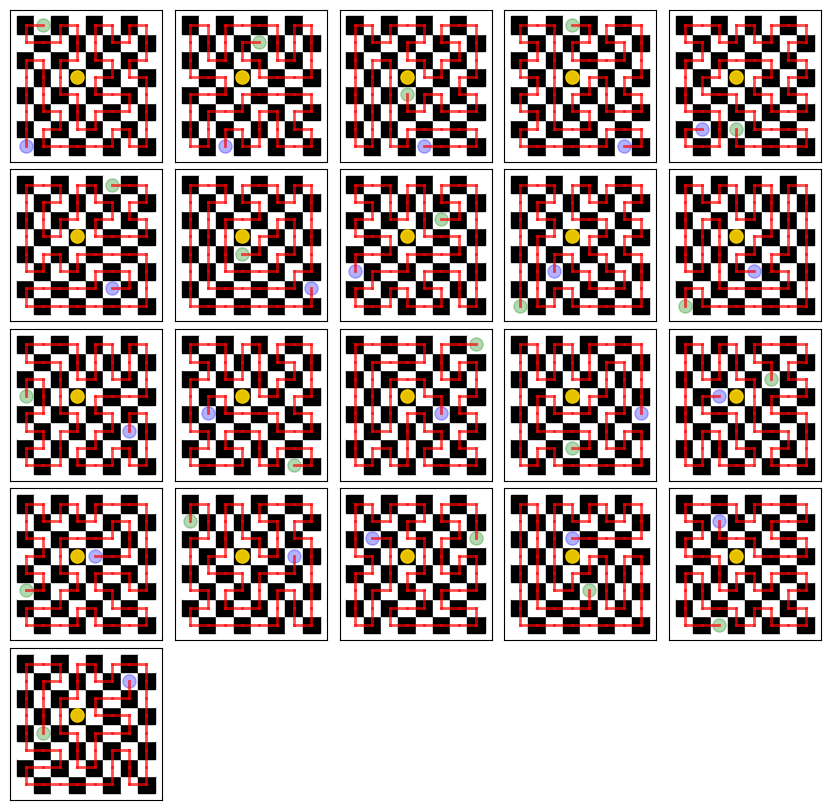

In [141]:
# --- Create figure with 4x8 subplots ---
fig, axes = plt.subplots(5, 5, figsize=(5*1.7, 5*1.7))
#fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))

axes = axes.flatten()

starts = [st for st in report.keys()]
for idx, ax in enumerate(axes):
    # Draw the 8x8 grid
    if idx < len(starts):

      start = starts[idx]
      status, selectlist, flowlist, finallist = report[start]

      for n, (r, c) in data.items():
          color = 'white' if (r + c) % 2 == 0 else 'k'
          ax.add_patch(plt.Rectangle((r, c), 1, 1, color=color))
          #ax.text(r + 0.5, c + 0.5, str(n), va='center', ha='center', fontsize=)

      # Draw flow connections
      for (i, j) in flowlist:
          x0, y0 = data[i]
          x1, y1 = data[j]
          ax.plot([x0 + 0.5, x1 + 0.5], [y0 + 0.5, y1 + 0.5], c='r', lw=2, alpha=0.7)

      # Highlight specific nodes
      for n in nodes:
          if n in finallist:
              ax.scatter(data[n][0] + 0.5, data[n][1] + 0.5, s=90, c='g', alpha=0.3)
          elif n == start:
              ax.scatter(data[n][0] + 0.5, data[n][1] + 0.5, s=90, c='b', alpha=0.3)
          elif n in blocked:
              ax.scatter(data[n][0] + 0.5, data[n][1] + 0.5, s=90, c='gold', alpha=0.9)

       # Clean axes
      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_aspect('equal')
      #ax.set_title(f"Board {idx+1}", fontsize=8)


plt.tight_layout()
for ax in axes[21:]:
    ax.axis('off')

# --- TIGHT layout control ---
plt.subplots_adjust(
    left=0.02, right=0.98, top=0.95, bottom=0.02,
    wspace=0.05, hspace=0.05
)
plt.show()

plt.show()
